In [8]:
#load dataset (student Portuguese score)
import pandas as pd

d = pd.read_csv('dataset/student-por.csv', sep=';')
len(d)

649

In [9]:
# generate binary Label (pass/fail) based on G1+G2+G3 (test grades, each 0-20 pts); threshold for passing is sum > 35
d['pass'] = d.apply(lambda row: 1 if (row['G1']+row['G2']+row['G3']) >= 35 else 0, axis=1) #axis 1: row, 0:column
d = d.drop(['G1','G2','G3'], axis=1)
d.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


In [10]:
# use one-hot encoding on categorical columns
d = pd.get_dummies(d, columns=['sex','school','address','famsize','Pstatus','Mjob','Fjob',
                             'reason','guardian','schoolsup','famsup','paid','activities',
                             'nursery','higher','internet','romantic'])
d.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [11]:
# shuffle rows
d = d.sample(frac=1)
# split training and test data
d_train = d[:500]
d_test = d[500:]

d_train_att = d_train.drop(['pass'], axis=1)
d_train_pass = d_train['pass']

d_test_att = d_test.drop(['pass'], axis=1)
d_test_pass = d_test['pass']

d_att = d.drop(['pass'], axis=1)
d_pass = d['pass']

# number of passing students in whole dataset
import numpy as np
print('Passing: %d out of %d (%.2f%%)' % (np.sum(d_pass), len(d_pass), 100*float(np.sum(d_pass)) / len(d_pass)))

Passing: 328 out of 649 (50.54%)


In [12]:
# fit a decision tree
from sklearn import tree
t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5) # max_depth == num of questions
t = t.fit(d_train_att, d_train_pass)

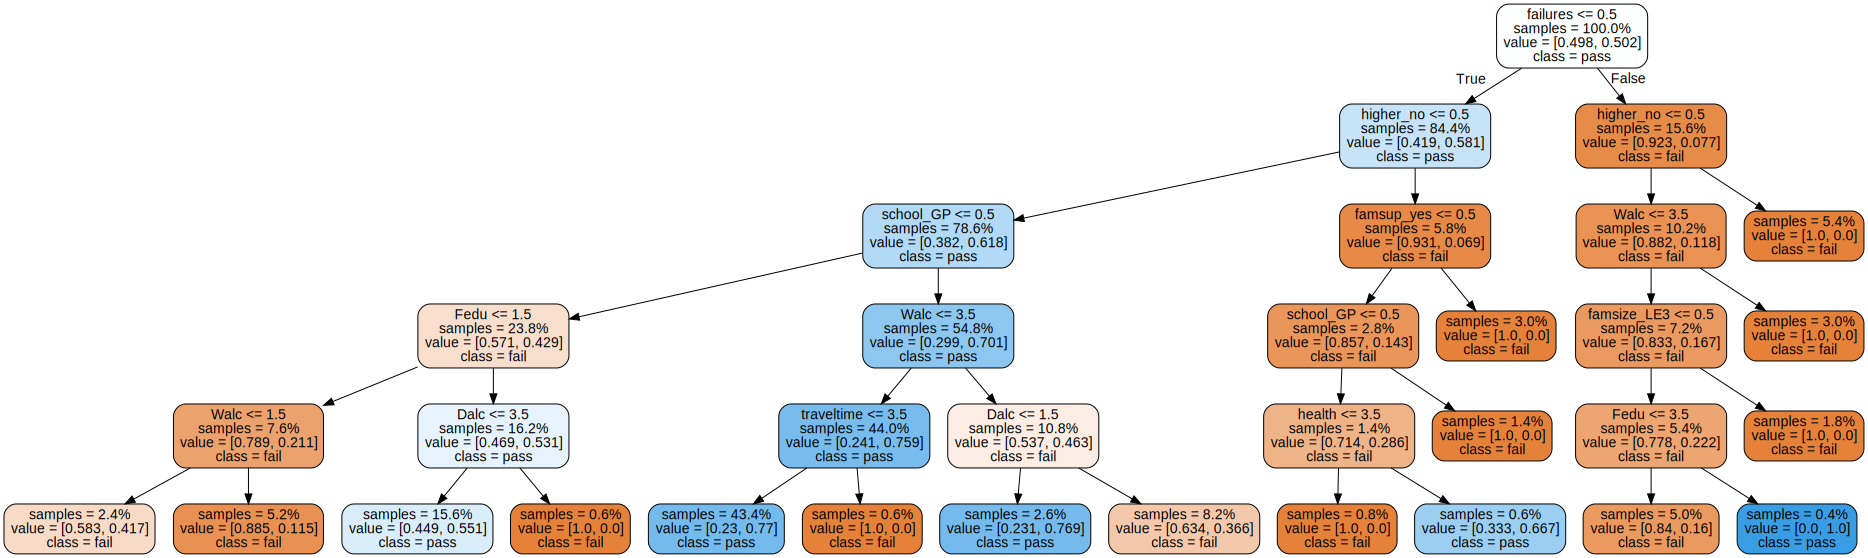

In [15]:
# visualize tree
import graphviz
dot_data = tree.export_graphviz(t, out_file=None, label='all', impurity=False, proportion=True,
                               feature_names=list(d_train_att), class_names=['fail', 'pass'],
                               filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [16]:
# save tree
tree.export_graphviz(t, out_file='student-performance.dot', label='all', impurity=False, proportion=True,
                               feature_names=list(d_train_att), class_names=['fail', 'pass'],
                               filled=True, rounded=True)

In [13]:
t.score(d_test_att, d_test_pass)

0.7046979865771812

In [14]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(t, d_att, d_pass, cv=5)
# show average score and =/- two standard deviations away (covering 95% of scores)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.69 (+/- 0.03)


In [17]:
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    print('Max depth: %d, Accuracy: %0.2f (+/- %0.2f)' % (max_depth, scores.mean(), scores.std() * 2))

Max depth: 1, Accuracy: 0.64 (+/- 0.06)
Max depth: 2, Accuracy: 0.69 (+/- 0.05)
Max depth: 3, Accuracy: 0.69 (+/- 0.04)
Max depth: 4, Accuracy: 0.68 (+/- 0.06)
Max depth: 5, Accuracy: 0.69 (+/- 0.04)
Max depth: 6, Accuracy: 0.70 (+/- 0.04)
Max depth: 7, Accuracy: 0.66 (+/- 0.06)
Max depth: 8, Accuracy: 0.65 (+/- 0.05)
Max depth: 9, Accuracy: 0.65 (+/- 0.06)
Max depth: 10, Accuracy: 0.65 (+/- 0.02)
Max depth: 11, Accuracy: 0.66 (+/- 0.06)
Max depth: 12, Accuracy: 0.64 (+/- 0.02)
Max depth: 13, Accuracy: 0.64 (+/- 0.04)
Max depth: 14, Accuracy: 0.62 (+/- 0.05)
Max depth: 15, Accuracy: 0.62 (+/- 0.03)
Max depth: 16, Accuracy: 0.63 (+/- 0.04)
Max depth: 17, Accuracy: 0.63 (+/- 0.04)
Max depth: 18, Accuracy: 0.61 (+/- 0.05)
Max depth: 19, Accuracy: 0.62 (+/- 0.04)


In [18]:
depth_acc = np.empty((19, 3), float)
i = 0
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    depth_acc[i,0] = max_depth
    depth_acc[i,1] = scores.mean()
    depth_acc[i,2] = scores.std() * 2
    i += 1
    
depth_acc

array([[ 1.        ,  0.63801026,  0.06391584],
       [ 2.        ,  0.6872667 ,  0.0541103 ],
       [ 3.        ,  0.6933499 ,  0.04118613],
       [ 4.        ,  0.6811246 ,  0.05528422],
       [ 5.        ,  0.69648664,  0.02706835],
       [ 6.        ,  0.69485313,  0.04019009],
       [ 7.        ,  0.66403601,  0.05591683],
       [ 8.        ,  0.65797648,  0.08145811],
       [ 9.        ,  0.6531356 ,  0.06805614],
       [10.        ,  0.64859122,  0.04900367],
       [11.        ,  0.65480434,  0.03027872],
       [12.        ,  0.6487571 ,  0.03446419],
       [13.        ,  0.64250875,  0.06370084],
       [14.        ,  0.62412887,  0.05451546],
       [15.        ,  0.6117733 ,  0.02814259],
       [16.        ,  0.63166705,  0.04732059],
       [17.        ,  0.63782126,  0.05105508],
       [18.        ,  0.63014125,  0.04911604],
       [19.        ,  0.62714653,  0.07016003]])

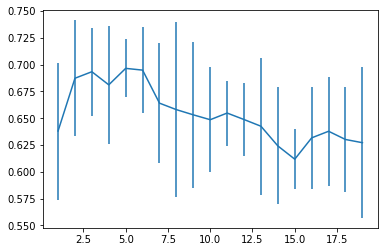

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.errorbar(depth_acc[:,0], depth_acc[:,1], yerr=depth_acc[:,2])
plt.show()